In [24]:
import matplotlib.pyplot as plt


In [1]:
pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import gym

In [3]:
env = gym.make('CartPole-v0')

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
import numpy as np

In [5]:
num_episodes= 100

In [6]:
def rand_policy(obs):
    return random.randint(0, 1)

In [8]:
reward_sum =[]

In [33]:
#taking number of timesteps as 100
num_timestep = 100

In [34]:
def test_policy(policy_func, n_scenario = num_episodes, max_actions = num_timestep, verbose=False):
    final_rewards = []
    for episode in range(n_scenario):
        if verbose and episode % 50 == 0:
            print(episode)
        episode_rewards = 0
        obs = env.reset()  
        for step in range(max_actions):
            action = policy_func(obs)
            obs, reward, done, info = env.step(action)
            episode_rewards += reward
            if done:
                break
        final_rewards.append(episode_rewards)
    return final_rewards

In [35]:
def plot_policy(final_rewards, policy_name:str=''):
    fig = plt.plot(range(len(final_rewards)), final_rewards)
    plt.grid()
    plt.title(policy_name + " Mean Reward {:.2f}, Std Reward {:.2f}".format(np.mean(final_rewards), np.min(final_rewards)))
    plt.ylabel('Cumulative reward Reward')
    plt.xlabel('Iteration')
    plt.ylim(0, max(final_rewards)*1.1)
    return fig

In [36]:
import random

A) Random Policy 

In [37]:
rand_rewards = test_policy(rand_policy)

/usr/local/lib/python3.9/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


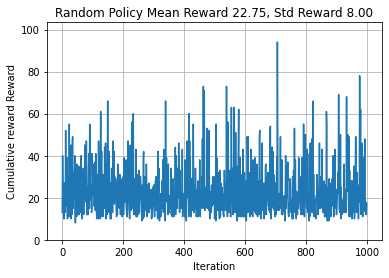

In [27]:
pt = plot_policy(rand_rewards, "Random Policy")

b)Theta policy

In [11]:
def theta_policy(obs):
    theta = obs[2]
    return 0 if theta < 0 else 1

In [38]:
the_rewards = test_policy(theta_policy)

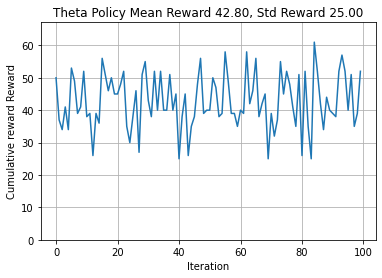

In [39]:
pt1 = plot_policy(the_rewards, "Theta Policy")

c)Omega policy

In [12]:
def omega_policy(obs):
    w = obs[3]
    return 0 if w < 0 else 1

In [41]:
omg_rewards = test_policy(omega_policy)

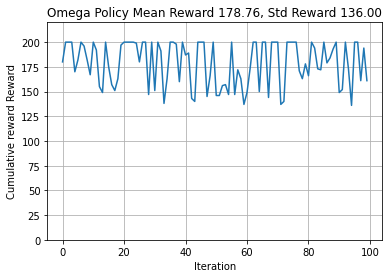

In [42]:
pt2 = plot_policy(omg_rewards, "Omega Policy")